In [1]:
# import pandas for handling data frames
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt

# Read data per province from Github repository of Protezione Civile
df=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",sep=',')

 # Clean up dataset and take out wrong data
df = df[df.denominazione_provincia.str.contains('In fase di definizione/aggiornamento')==False]
# transform timestamp into datetime
df['data']=pd.to_datetime(df['data'])
#Get the date into str of teh last update
lastday=df['data'].iloc[len(df['data'])-1]
lastday=lastday.to_pydatetime()
lastday=lastday.strftime('%d/%m/%Y')


In [2]:
# Setting criteria to extact subdata frame
# define a string with the target region I want the data per province plotted , can be any of the unique 'denominazione_regione'
regtarget='Lombardia'
# extract (and show) the unique list of provinces in the target region
provincie=df[df.denominazione_regione == regtarget].denominazione_provincia.unique()
#provincie=('Milano', 'Torino',  'Roma', 'Napoli', 'Genova', 'Palermo' )


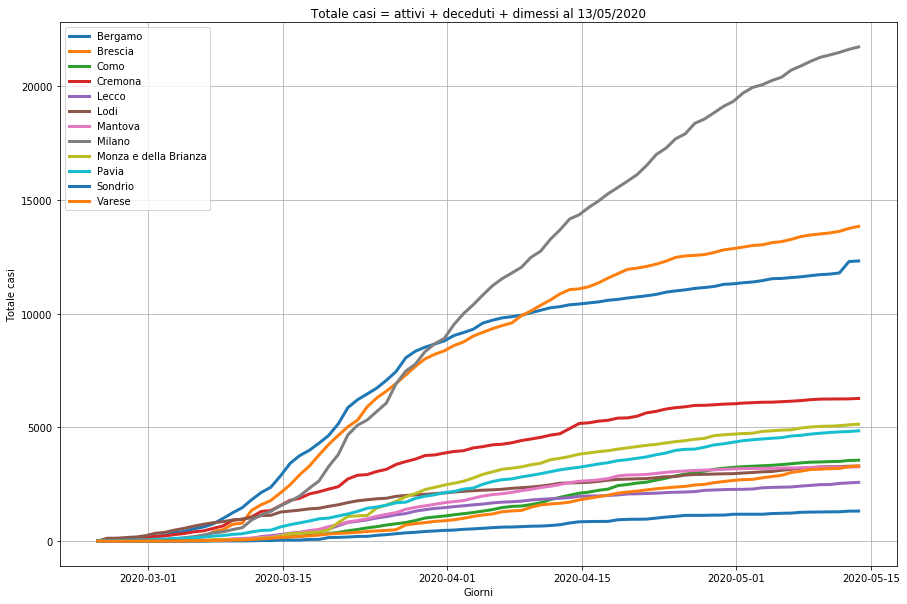

In [3]:
# Total cases covid19
titolo='Totale casi = attivi + deceduti + dimessi al ' + lastday
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
#loop to plot all the sub-dataset per provincia on the same graph 
for elem in provincie:
    df2=df[df.denominazione_provincia == elem] 
    ax.plot(df2.data,df2.totale_casi, lw=3, label=elem)
    #ax.minorticks_on()
    #ax.grid(True, which ="minor", ls='--')
    ax.grid(True, which ="major", ls='-')
    
plt.ylabel('Totale casi')
plt.xlabel('Giorni')
plt.legend()
plt.title(titolo)
#plt.show()
plt.savefig('Total case top 6 cities.png')


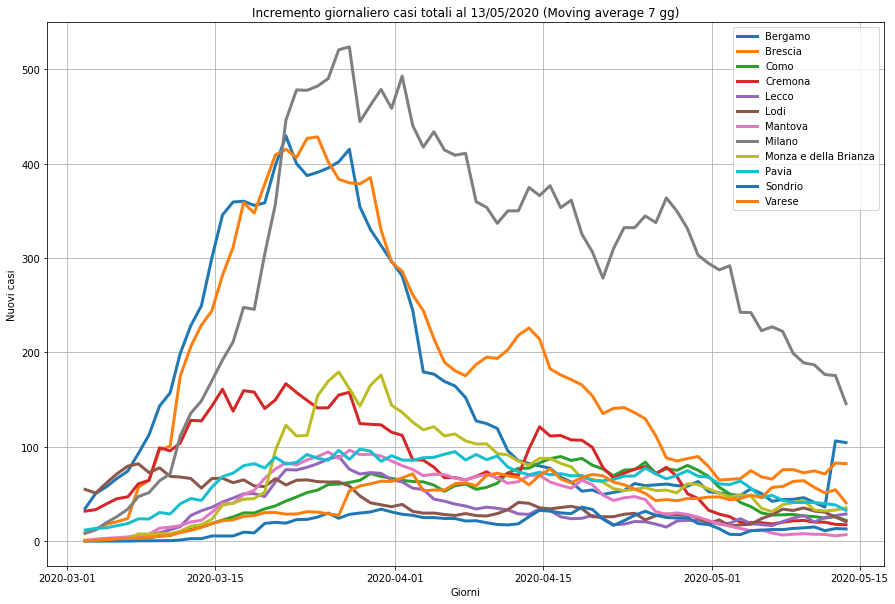

In [4]:
# Daily increment cases covid19

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
MA = 7 
titolo='Incremento giornaliero casi totali al ' + lastday + " (Moving average " + str(MA) + " gg)"
#loop to plot all the sub-dataset per provincia on the same graph 
for elem in provincie:
    df2=df[df.denominazione_provincia == elem] 
    deltacasi=df2['totale_casi'].diff()
    deltacasiMA = deltacasi.rolling(window=MA).mean()
    ax.plot(df2.data,deltacasiMA, lw=3, label=elem)
    #ax.minorticks_on()
    #ax.grid(True, which ="minor", ls='--')
    ax.grid(True, which ="major", ls='-')
    
plt.ylabel('Nuovi casi')
plt.xlabel('Giorni')
plt.legend()
plt.title(titolo)
#plt.show()
plt.savefig('Daily Increment top 6 cities.png')